In [1]:
%run GLOBALS.py

3.5.1 (v3.5.1:37a07cee5969, Dec  5 2015, 21:12:44) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]


In [2]:
import matplotlib

matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

In [3]:
#import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import elviz_utils
import abundance_utils
import abundance_plot_utils

# Plotting

In [5]:
data_reduced_genus = pd.read_csv(MAIN_DIR + "results/reduced_data--genus_only.csv")

In [6]:
abundance_utils.filter_by_abundance(data=data_reduced_genus, 
                    abundance_column='fraction of reads', high=1, low=0.5).head()

['Methylobacter' 'other' 'Methylophilus']


,ID,rep,week,oxy,Genus,Length,fraction of reads,project
0,118_HOW13,4,13,High,Methylobacter,4326741,0.820344,1056250
1,130_HOW14,4,14,High,Methylobacter,4428101,0.776829,1056274
2,106_HOW12,4,12,High,Methylobacter,4325001,0.623003,1056226
3,82_HOW10,4,10,High,Methylobacter,5488758,0.589218,1056178
4,16_LOW5,4,5,Low,other,40011267,0.548044,137285980


## Demo `plot_heatmap()`

keep only High oxygen samples
['Methylobacter' 'Methylophilus']
filename: High_oxygen--0.5_to_1_abundance


/Users/janet/.virtualenvs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


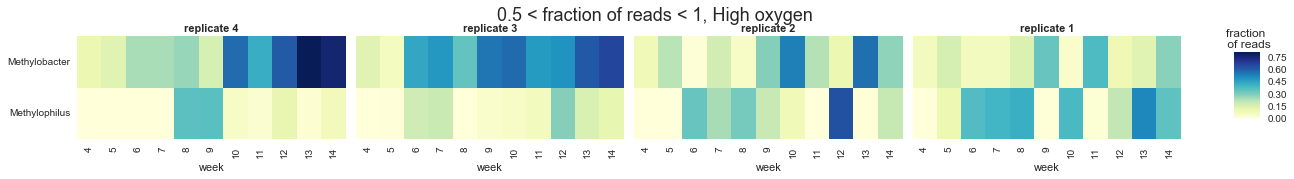

In [7]:
plot_path = PLOT_DIR + "/genus_only"

abundance_plot_utils.plot_heatmap_genus(dataframe=data_reduced_genus, 
                                        high=1, low = 0.5, 
                                        oxy='High', rep='all', 
                                        plot_dir=plot_path)

## Run `plot_heatmap_genus()` across broad conditions

keep only Low oxygen samples
['other' 'Methylobacter' 'Methylotenera' 'Flavobacterium' 'Methylophilus']
filename: Low_oxygen--0.01_to_1_abundance
keep only Low oxygen samples
['other' 'Methylobacter' 'Methylotenera' 'Flavobacterium' 'Methylophilus']
filename: Low_oxygen--0.05_to_1_abundance
keep only Low oxygen samples
['other' 'Methylobacter' 'Methylotenera' 'Flavobacterium' 'Methylophilus']
filename: Low_oxygen--0.1_to_1_abundance
keep only Low oxygen samples
['other' 'Methylobacter']
filename: Low_oxygen--0.5_to_1_abundance
keep only High oxygen samples
['Methylobacter' 'Methylosarcina' 'Methylophilus' 'other' 'Methylotenera']
filename: High_oxygen--0.01_to_1_abundance
keep only High oxygen samples
['Methylobacter' 'Methylosarcina' 'Methylophilus' 'other' 'Methylotenera']
filename: High_oxygen--0.05_to_1_abundance
keep only High oxygen samples
['Methylobacter' 'Methylosarcina' 'Methylophilus' 'other' 'Methylotenera']
filename: High_oxygen--0.1_to_1_abundance
keep only High oxygen sa

/Users/janet/.virtualenvs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


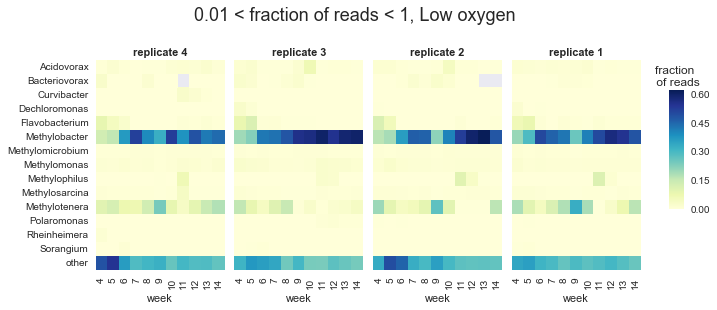

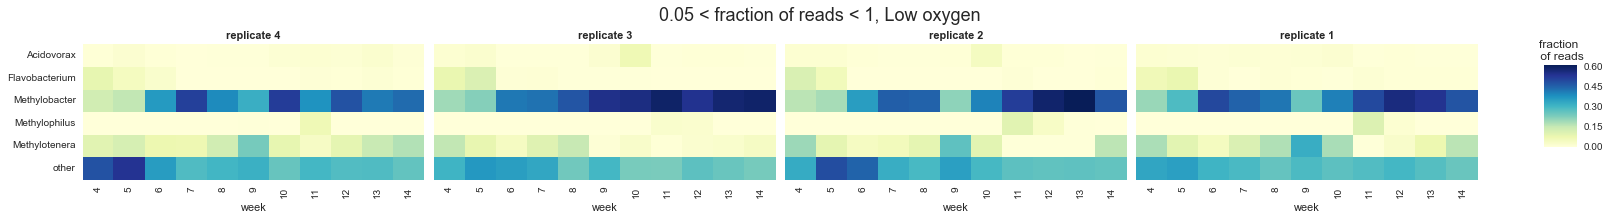

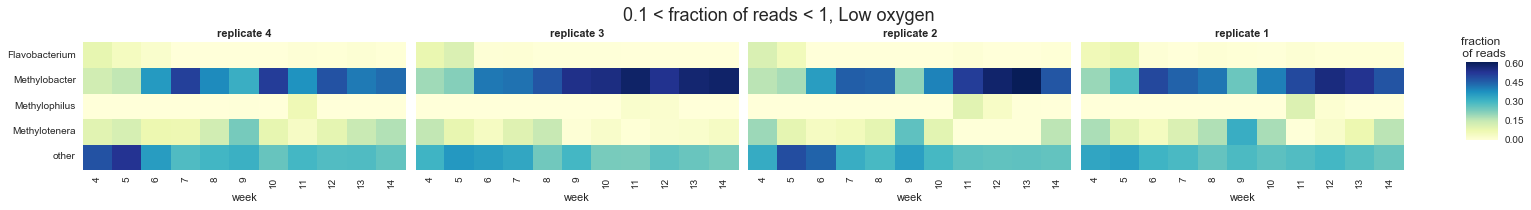

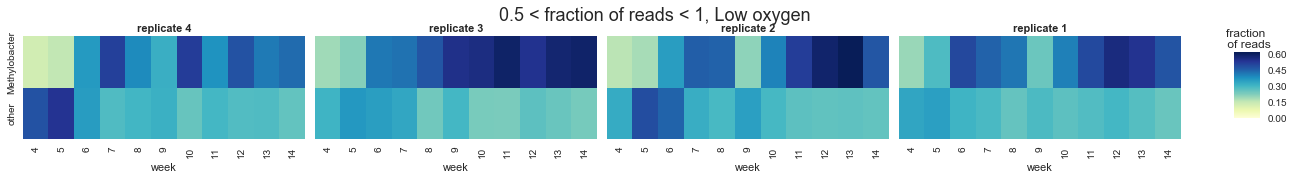

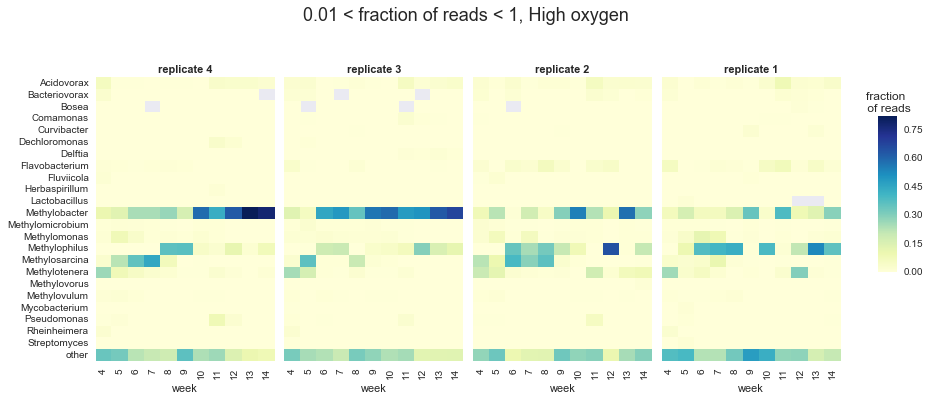

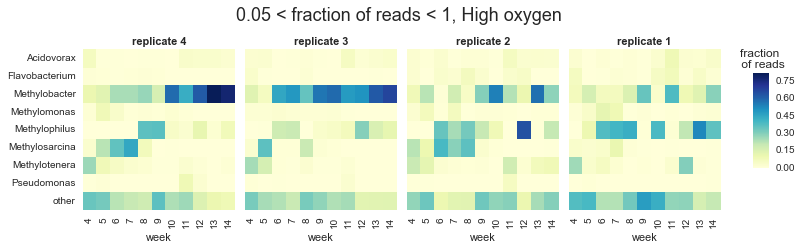

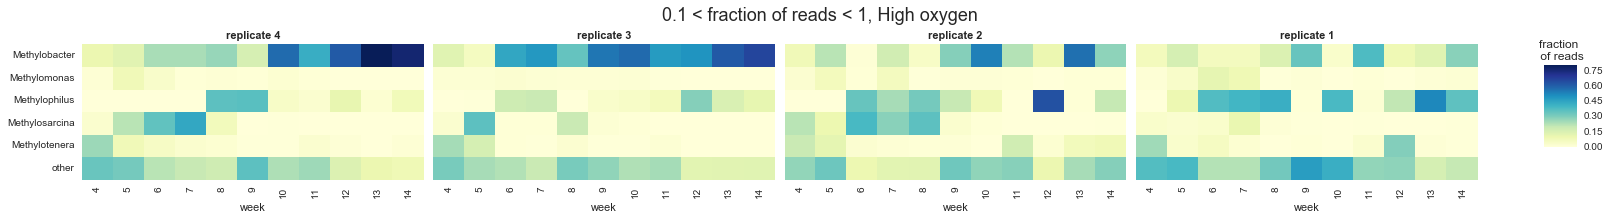

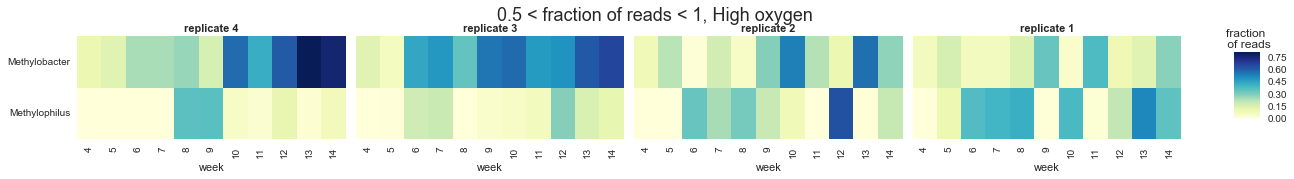

In [8]:
# Loop through the ranges we want. 
oxy_conditions = ['Low', 'High']
max_abundance = 1
range_pairs = [(0.01, max_abundance), 
               (0.05, max_abundance), 
               (0.1, max_abundance), 
               (0.5, max_abundance)]
for o in oxy_conditions:
    for r in range_pairs:
        #print "oxygen:", o
        #print "range:", r
        #print "range (low):", r[0]
        abundance_plot_utils.plot_heatmap_genus(dataframe=data_reduced_genus,
                                                low =r[0], high=r[1], oxy=o, rep='all',
                                                plot_dir = PLOT_DIR + '/genus_only')

## `plot_across_phylogeny()`

Reproduce Mila's plots which often have mixed phylogeny levels.

Import the data that was *not* reduced to Genus. 

In [9]:
data_reduced = pd.read_csv(MAIN_DIR + "/results/reduced_data--all_phylogeny_remains.csv")

In [10]:
plot_1_spec_dict = {'Phylum':['Bacteroidetes'], 
                    'Order':['Burkholderiales','Methylophilales',
                             'Methylococcales']}

In [11]:
plot_1_data = abundance_plot_utils.aggregate_mixed_phylogeny(dataframe = 
                          pd.read_csv(
        MAIN_DIR + "/results/reduced_data--all_phylogeny_remains.csv"),
                          phylo_dict = plot_1_spec_dict,
                                                            main_dir = MAIN_DIR)

Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'fraction of reads', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'fraction of reads', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'fraction of reads', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'fraction of reads', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')


In [12]:
plot_1_data.head()

,ID,abundance sum,phylogenetic level,phylogenetic name,oxy,rep,week,project
0,100_LOW12,0.014210,Phylum,Bacteroidetes,Low,4,12,1056214
1,100_LOW12,0.084171,Order,Burkholderiales,Low,4,12,1056214
2,100_LOW12,0.100862,Order,Methylophilales,Low,4,12,1056214
3,100_LOW12,0.593550,Order,Methylococcales,Low,4,12,1056214
4,103_HOW12,0.015161,Phylum,Bacteroidetes,High,1,12,1056217


In [13]:
p_dicts = [
    {'Phylum':['Bacteroidetes'], 
     'Order':['Burkholderiales', 'Methylophilales', 'Methylococcales']},
        
    {'Genus':['Methylobacter', 'Methylovulum', 'Methylomonas', 'Methylomicrobium', 
              'Methyloglobulus', 'Methylococcus', 'Methylocaldum', 'Methylosarcina']},
    
    {'Genus':['Methylotenera', 'Methylovorus', 'Methylophilus', 'Methylobacillus']}

    ]

In [14]:
for p in p_dicts:
    print(p)
    print(abundance_plot_utils.phylo_dict_to_descriptive_string(p))

{'Phylum': ['Bacteroidetes'], 'Order': ['Burkholderiales', 'Methylophilales', 'Methylococcales']}
Phylum
Order
Phylum-Bacteroidetes--Order-Burkholderiales_Methylophilales_Methylococcales
{'Genus': ['Methylobacter', 'Methylovulum', 'Methylomonas', 'Methylomicrobium', 'Methyloglobulus', 'Methylococcus', 'Methylocaldum', 'Methylosarcina']}
Genus
Genus-Methylobacter_Methylovulum_Methylomonas_Methylomicrobium_Methyloglobulus_Methylococcus_Methylocaldum_Methylosarcina
{'Genus': ['Methylotenera', 'Methylovorus', 'Methylophilus', 'Methylobacillus']}
Genus
Genus-Methylotenera_Methylovorus_Methylophilus_Methylobacillus


In [15]:
print(MAIN_DIR)
print(PLOT_DIR)

../
/plots


Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'fraction of reads', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'fraction of reads', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'fraction of reads', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'fraction of reads', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
plot_data.head()
          ID  abundance sum phylogenetic level phylogenetic name   oxy  rep  \
0  100_LOW12       0.014210             Phylum     Bacteroidetes   Low    4   
1  100_LOW12       0.084171              Order   Burkholderiales   Low    4   
2  100_LOW12       0.100862              Order   Methylophilales   Low    4   
3  100_

/Users/janet/.virtualenvs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


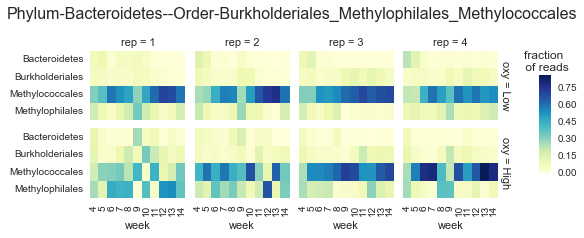

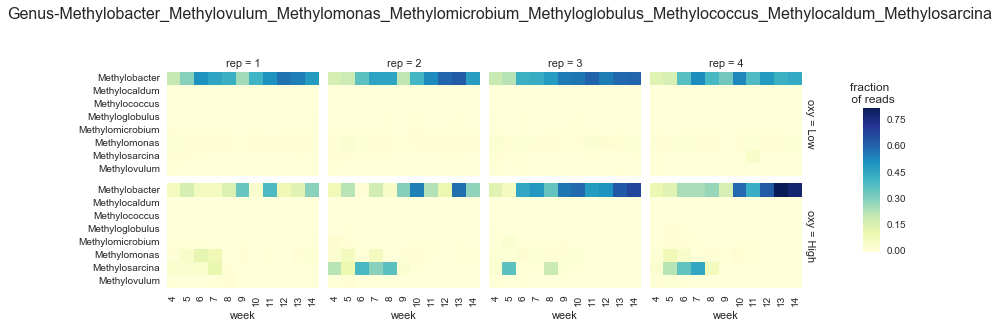

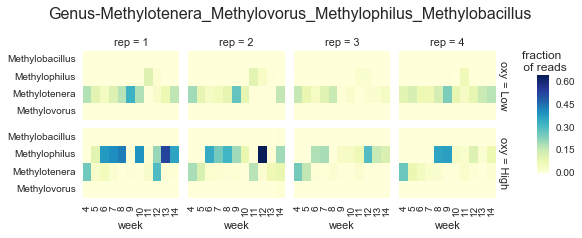

In [ ]:
# plot without annotations
for p_dict in p_dicts:
    abundance_plot_utils.plot_across_phylogeny(
        dataframe = pd.read_csv(MAIN_DIR + "/results/reduced_data--all_phylogeny_remains.csv"),
        phylo_dict = p_dict,
        annotate=False,
        main_dir = MAIN_DIR,
        plot_dir= PLOT_DIR + '/mixed_phylogeny/')
    

In [ ]:
# plot with annotations
for p_dict in p_dicts:
    abundance_plot_utils.plot_across_phylogeny(dataframe = 
                                               pd.read_csv(MAIN_DIR + "/results/reduced_data--all_phylogeny_remains.csv"),
                                               phylo_dict = p_dict,
                                               facet = 'rep',
                                               annotate = False,
                                               main_dir = MAIN_DIR,
                                               plot_dir = PLOT_DIR + '/mixed_phylogeny/')

Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'fraction of reads', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'fraction of reads', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'fraction of reads', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'fraction of reads', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
plot_data.head()
          ID  abundance sum phylogenetic level phylogenetic name   oxy  rep  \
0  100_LOW12       0.014210             Phylum     Bacteroidetes   Low    4   
1  100_LOW12       0.084171              Order   Burkholderiales   Low    4   
2  100_LOW12       0.100862              Order   Methylophilales   Low    4   
3  100_